# Home Credit Default Risk - Data Exploration

##  Overview
This notebook explores the Home Credit dataset to understand:
1. Data structure and relationships
2. Missing values and data quality
3. Target variable distribution
4. Feature distributions and relationships

##  Target Variable
- **TARGET = 1**: Client with payment difficulties
- **TARGET = 0**: Client without payment difficulties


##  Setup and Imports

# Import libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Adding project utilities
import sys
sys.path.append('../src')
from utils import load_config, load_data, display_data_info, get_file_sizes

# Load configuration
config = load_config()
print("Configuration loaded successfully")

# Check file sizes
file_sizes = get_file_sizes()
print("\nFile sizes in MB:")
for file, size in file_sizes.items():
    print(f"  {file}: {size:.2f} MB")

Configuration loaded successfully

File sizes in MB:
  application_test.csv: 25.34 MB
  application_train.csv: 158.44 MB
  bureau.csv: 162.14 MB
  bureau_balance.csv: 358.19 MB
  credit_card_balance.csv: 404.91 MB
  HomeCredit_columns_description.csv: 0.04 MB
  installments_payments.csv: 689.62 MB
  POS_CASH_balance.csv: 374.51 MB
  previous_application.csv: 386.21 MB
  sample_submission.csv: 0.51 MB


## Load Main Data Files

In [20]:
# Load application_train data (10% sample for quick exploration)
print("Loading application_train data (10% sample)...")
app_train = load_data(config['files']['application_train'], nrows=None) 
print(f"\nTraining data shape: {app_train.shape}")

display_data_info(app_train, "Application Train")

Loading application_train data (10% sample)...
Loading application_train.csv...
Initial memory usage: 286.23 MB
Final memory usage: 128.16 MB
Memory reduced by 55.2%
Loaded 307511 rows and 122 columns
Memory usage: 128.16 MB

Training data shape: (307511, 122)
=== Application Train Information ===
Shape: 307511 rows, 122 columns
Memory usage: 128.16 MB

Column Types:
float32    65
int8       37
str        16
int32       2
int16       2
Name: count, dtype: int64

Missing Values:
                          missing_count  missing_percent
COMMONAREA_MEDI                  214865        69.872297
COMMONAREA_MODE                  214865        69.872297
COMMONAREA_AVG                   214865        69.872297
NONLIVINGAPARTMENTS_MODE         213514        69.432963
NONLIVINGAPARTMENTS_MEDI         213514        69.432963
NONLIVINGAPARTMENTS_AVG          213514        69.432963
FONDKAPREMONT_MODE               210295        68.386172
LIVINGAPARTMENTS_AVG             210199        68.354953
LIVI

## Target Variable Analysis

Target Distribution:
0 (No Payment Difficulties): 282,686 (91.93%)
1 (Payment Difficulties): 24,825 (8.07%)


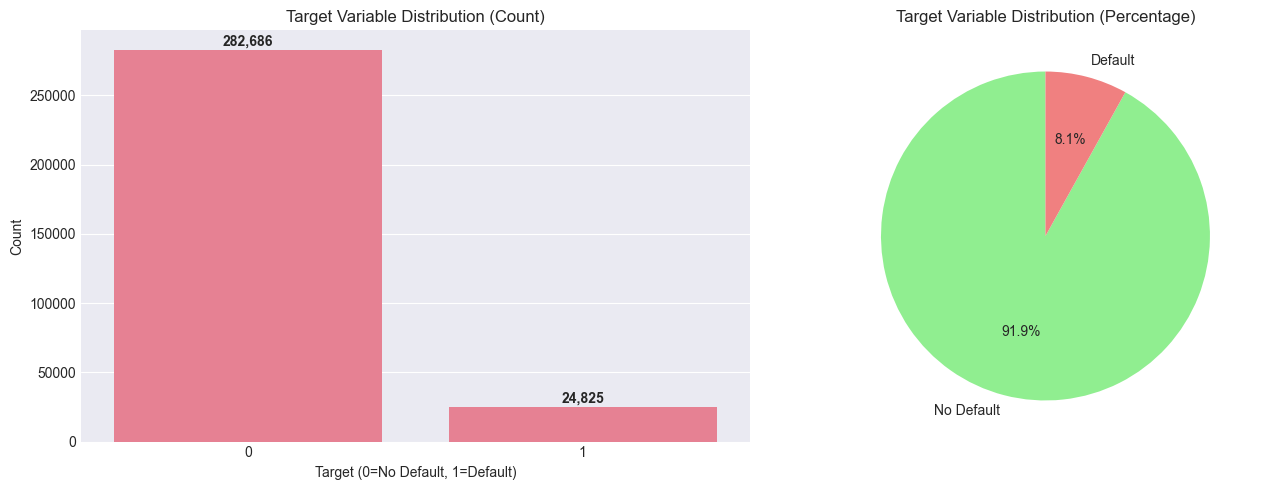

In [21]:
# Check target distribution
if 'TARGET' in app_train.columns:
    target_dist = app_train['TARGET'].value_counts()
    target_pct = app_train['TARGET'].value_counts(normalize=True) * 100
    
    print("Target Distribution:")
    print(f"0 (No Payment Difficulties): {target_dist[0]:,} ({target_pct[0]:.2f}%)")
    print(f"1 (Payment Difficulties): {target_dist[1]:,} ({target_pct[1]:.2f}%)")
    
    # Plot target distribution
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Count plot
    sns.countplot(x='TARGET', data=app_train, ax=axes[0])
    axes[0].set_title('Target Variable Distribution (Count)')
    axes[0].set_xlabel('Target (0=No Default, 1=Default)')
    axes[0].set_ylabel('Count')
    
    # Add count labels on bars
    for i, count in enumerate(target_dist):
        axes[0].text(i, count + 1000, f'{count:,}', ha='center', va='bottom', fontweight='bold')
    
    # Percentage plot
    axes[1].pie(target_dist.values, labels=['No Default', 'Default'], 
                autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
    axes[1].set_title('Target Variable Distribution (Percentage)')
    
    plt.tight_layout()
    plt.show()

## Missing Values Analysis

Columns with missing values: 67
Total missing cells: 9,152,465
Overall data missing: 24.40%


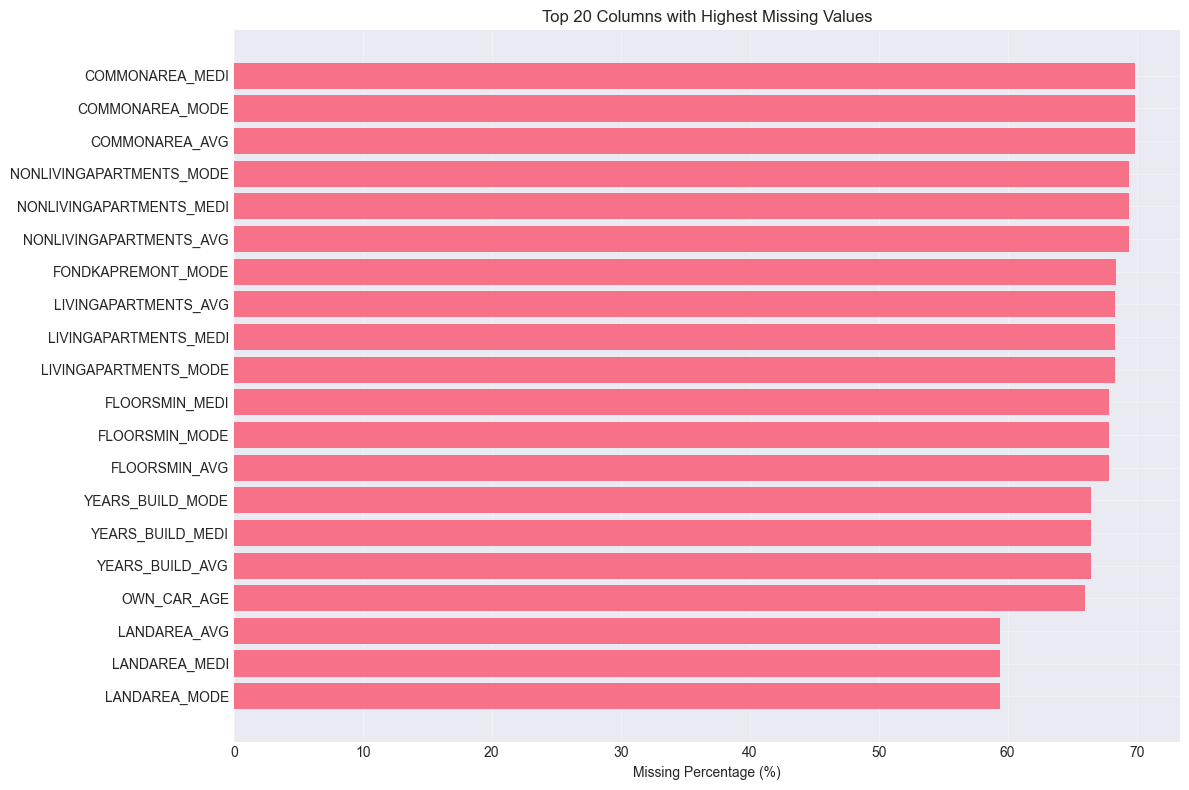

In [22]:
# Calculate missing values percentage for all columns
missing = app_train.isnull().sum()
missing_percent = 100 * missing / len(app_train)
missing_df = pd.DataFrame({
    'missing_count': missing,
    'missing_percent': missing_percent
})

# Sort by missing percentage
missing_df = missing_df[missing_df['missing_count'] > 0].sort_values('missing_percent', ascending=False)

print(f"Columns with missing values: {len(missing_df)}")
print(f"Total missing cells: {missing.sum():,}")
print(f"Overall data missing: {100 * missing.sum() / (app_train.shape[0] * app_train.shape[1]):.2f}%")

# Visualize top 20 columns with highest missing values
if len(missing_df) > 0:
    plt.figure(figsize=(12, 8))
    top_missing = missing_df.head(20)
    
    plt.barh(range(len(top_missing)), top_missing['missing_percent'])
    plt.yticks(range(len(top_missing)), top_missing.index)
    plt.xlabel('Missing Percentage (%)')
    plt.title('Top 20 Columns with Highest Missing Values')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## Numeric Features Analysis

Number of numeric columns: 66
First 10 numeric columns: ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1']
Summary statistics for numeric columns:
                               count           mean            std  \
AMT_INCOME_TOTAL            307511.0  168797.921875  237123.140625   
AMT_CREDIT                  307511.0  599026.000000  402490.781250   
AMT_ANNUITY                 307499.0   27108.574219   14493.737305   
AMT_GOODS_PRICE             307233.0  538396.187500  369446.468750   
REGION_POPULATION_RELATIVE  307511.0       0.020868       0.013831   
...                              ...            ...            ...   
AMT_REQ_CREDIT_BUREAU_DAY   265992.0       0.007000       0.110757   
AMT_REQ_CREDIT_BUREAU_WEEK  265992.0       0.034362       0.204685   
AMT_REQ_CREDIT_BUREAU_MON   265992.0       0.267395       0.916002   
AMT_REQ_CREDIT_BU

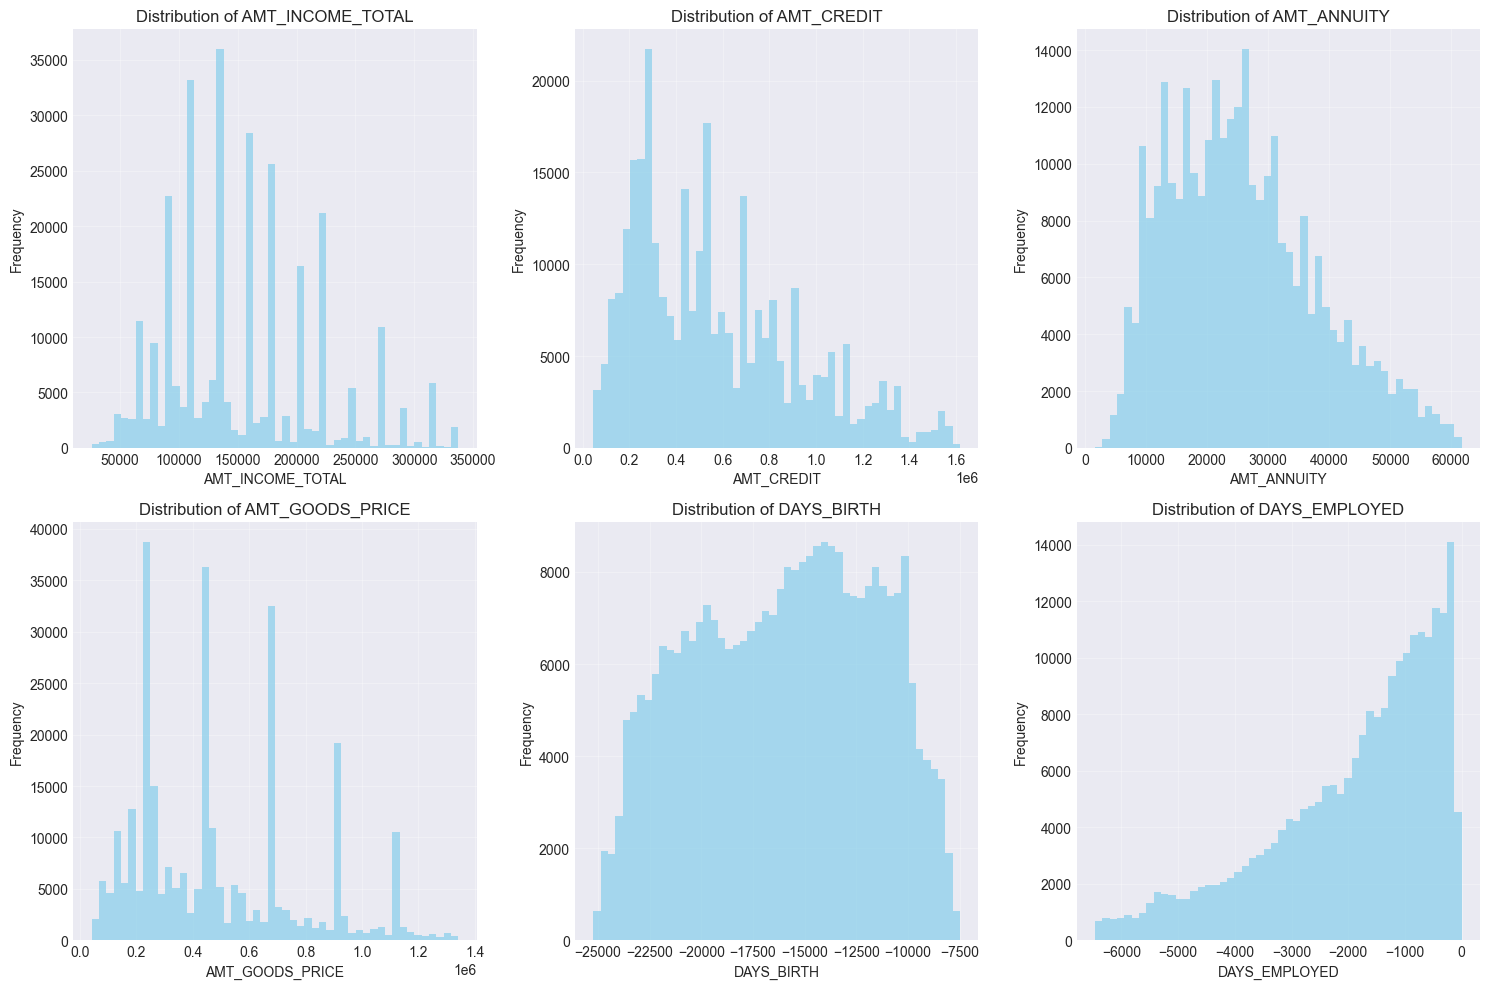

In [23]:
# Get numeric columns
numeric_cols = app_train.select_dtypes(include=['int', 'float']).columns.tolist()
# Remove target and ID columns
numeric_cols = [col for col in numeric_cols if col not in ['TARGET', 'SK_ID_CURR']]

print(f"Number of numeric columns: {len(numeric_cols)}")
print(f"First 10 numeric columns: {numeric_cols[:10]}")

# Summary statistics for numeric columns
print("Summary statistics for numeric columns:")
print(app_train[numeric_cols].describe().transpose())

# Visualize distributions of key numeric features
key_features = [
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
    'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED'
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(key_features):
    if feature in app_train.columns:
        # Remove outliers for better visualization
        data = app_train[feature].dropna()
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        filtered_data = data[(data >= Q1 - 1.5 * IQR) & (data <= Q3 + 1.5 * IQR)]
        
        axes[i].hist(filtered_data, bins=50, alpha=0.7, color='skyblue')
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Categorical Features Analysis

Number of categorical columns: 16
Categorical columns: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


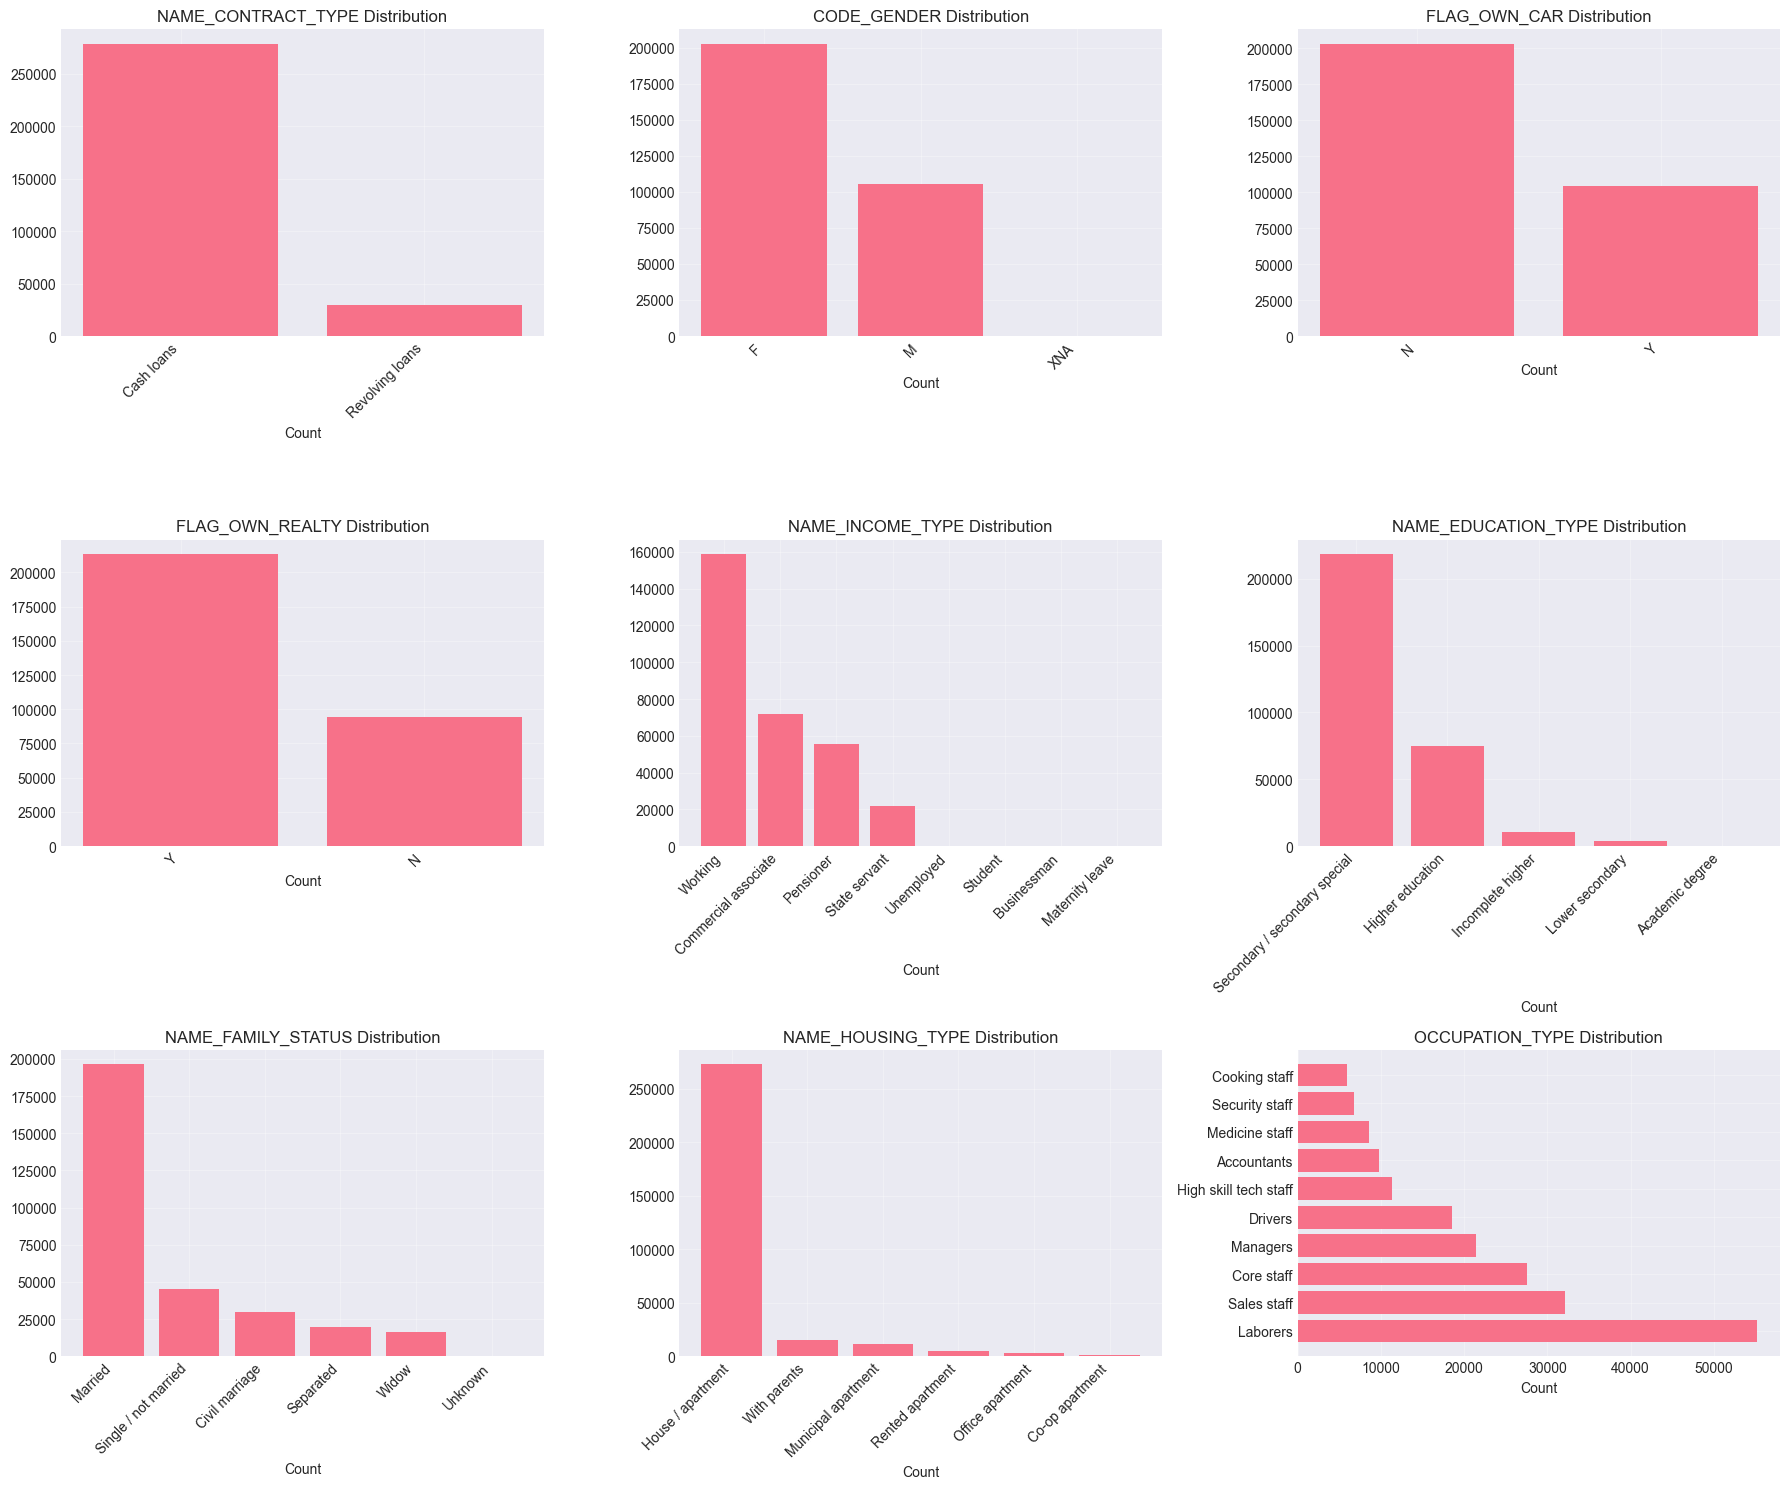

In [24]:
# Get categorical columns
categorical_cols = app_train.select_dtypes(include=['object']).columns.tolist()
print(f"Number of categorical columns: {len(categorical_cols)}")
print(f"Categorical columns: {categorical_cols}")

# %%
# Analyze key categorical features
key_categorical = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'
]

# Filter to columns that exist
key_categorical = [col for col in key_categorical if col in app_train.columns]

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, feature in enumerate(key_categorical):
    if i < len(axes):
        value_counts = app_train[feature].value_counts()
        
        # For features with many categories, show top 10
        if len(value_counts) > 10:
            top_values = value_counts.head(10)
            axes[i].barh(range(len(top_values)), top_values.values)
            axes[i].set_yticks(range(len(top_values)))
            axes[i].set_yticklabels(top_values.index)
        else:
            axes[i].bar(range(len(value_counts)), value_counts.values)
            axes[i].set_xticks(range(len(value_counts)))
            axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')
        
        axes[i].set_title(f'{feature} Distribution')
        axes[i].set_xlabel('Count')
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Relationships with Target

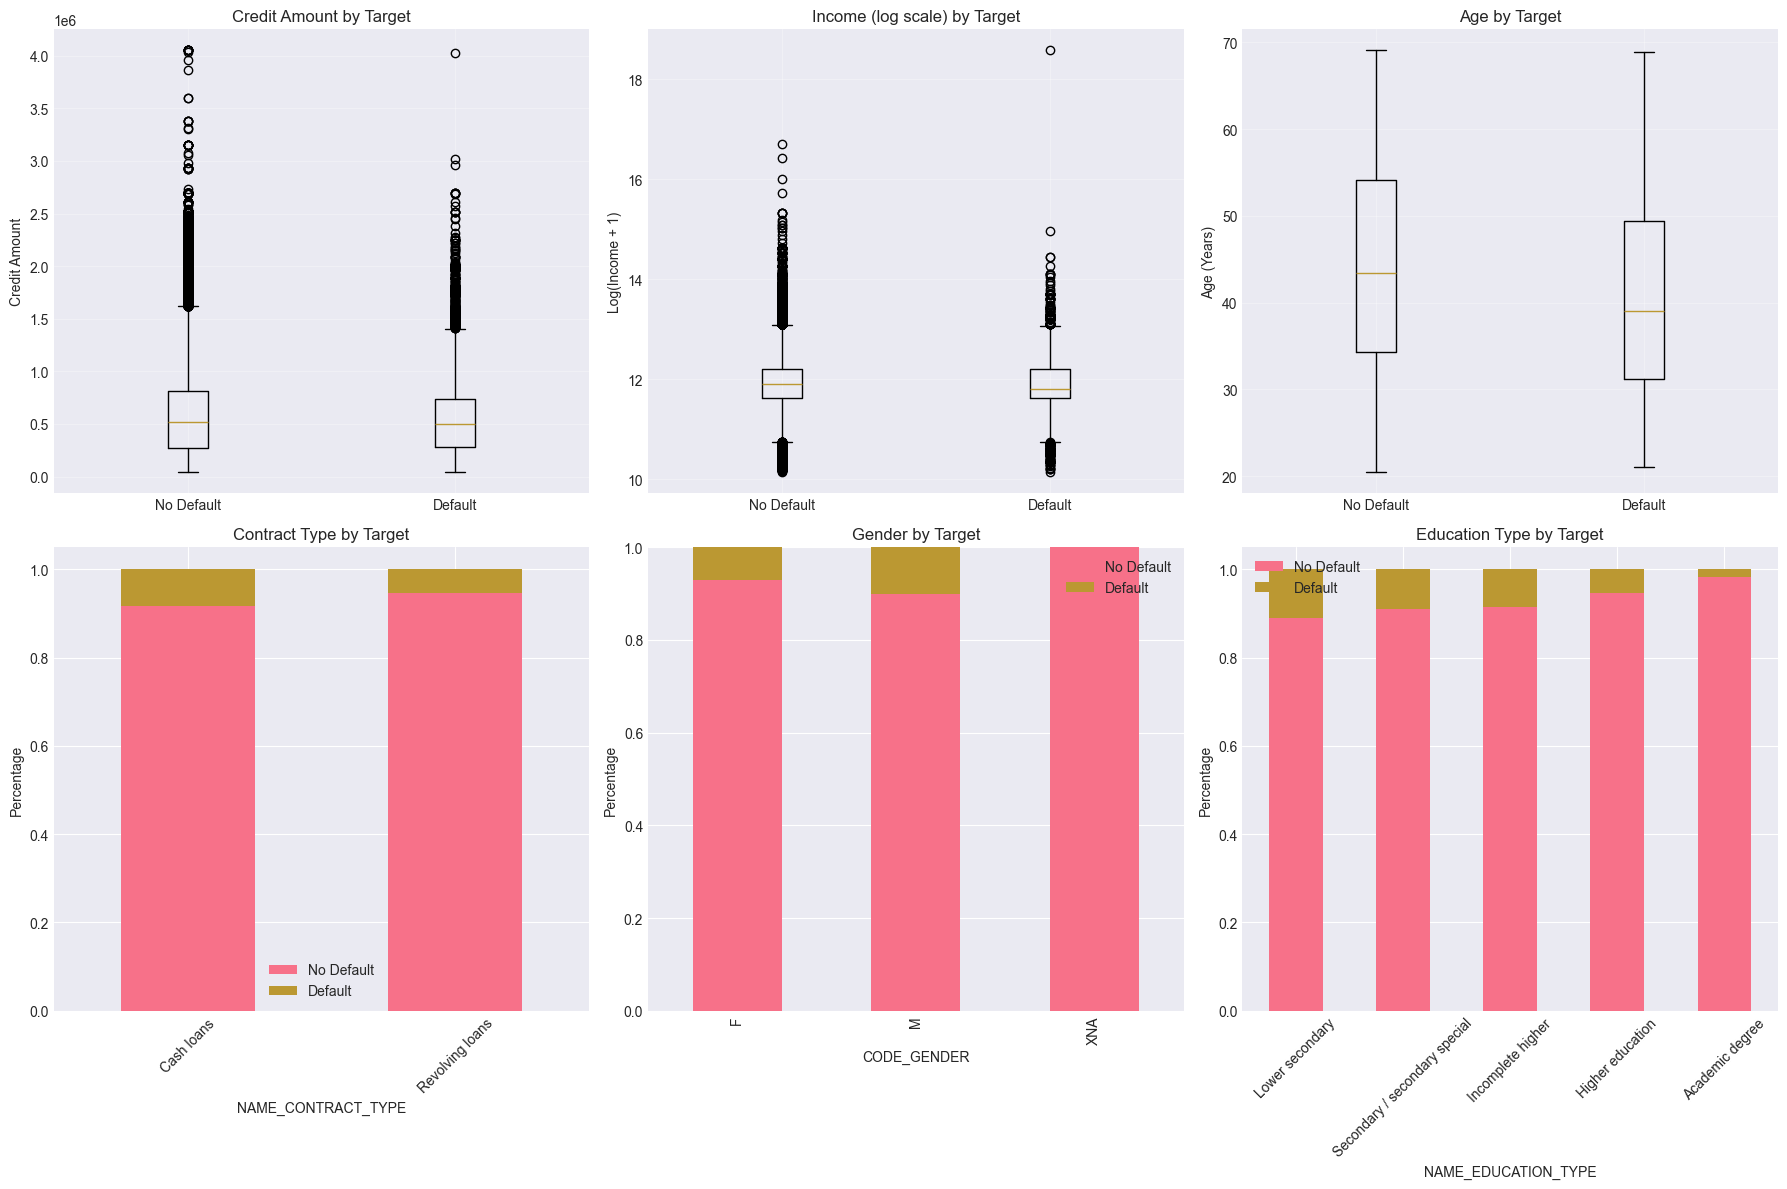

In [25]:
# Analyze how key features relate to target
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Credit amount by target
if 'AMT_CREDIT' in app_train.columns:
    axes[0, 0].boxplot([
        app_train[app_train['TARGET'] == 0]['AMT_CREDIT'].dropna(),
        app_train[app_train['TARGET'] == 1]['AMT_CREDIT'].dropna()
    ], labels=['No Default', 'Default'])
    axes[0, 0].set_title('Credit Amount by Target')
    axes[0, 0].set_ylabel('Credit Amount')
    axes[0, 0].grid(True, alpha=0.3)

# 2. Income by target
if 'AMT_INCOME_TOTAL' in app_train.columns:
    # Use log scale for better visualization
    data_0 = np.log1p(app_train[app_train['TARGET'] == 0]['AMT_INCOME_TOTAL'].dropna())
    data_1 = np.log1p(app_train[app_train['TARGET'] == 1]['AMT_INCOME_TOTAL'].dropna())
    
    axes[0, 1].boxplot([data_0, data_1], labels=['No Default', 'Default'])
    axes[0, 1].set_title('Income (log scale) by Target')
    axes[0, 1].set_ylabel('Log(Income + 1)')
    axes[0, 1].grid(True, alpha=0.3)

# 3. Age by target
if 'DAYS_BIRTH' in app_train.columns:
    # Convert to years
    app_train['AGE'] = -app_train['DAYS_BIRTH'] / 365.25
    axes[0, 2].boxplot([
        app_train[app_train['TARGET'] == 0]['AGE'],
        app_train[app_train['TARGET'] == 1]['AGE']
    ], labels=['No Default', 'Default'])
    axes[0, 2].set_title('Age by Target')
    axes[0, 2].set_ylabel('Age (Years)')
    axes[0, 2].grid(True, alpha=0.3)

# 4. Contract type by target
if 'NAME_CONTRACT_TYPE' in app_train.columns:
    contract_target = pd.crosstab(app_train['NAME_CONTRACT_TYPE'], app_train['TARGET'], normalize='index')
    contract_target.plot(kind='bar', stacked=True, ax=axes[1, 0])
    axes[1, 0].set_title('Contract Type by Target')
    axes[1, 0].set_ylabel('Percentage')
    axes[1, 0].legend(['No Default', 'Default'])
    axes[1, 0].tick_params(axis='x', rotation=45)

# 5. Gender by target
if 'CODE_GENDER' in app_train.columns:
    gender_target = pd.crosstab(app_train['CODE_GENDER'], app_train['TARGET'], normalize='index')
    gender_target.plot(kind='bar', stacked=True, ax=axes[1, 1])
    axes[1, 1].set_title('Gender by Target')
    axes[1, 1].set_ylabel('Percentage')
    axes[1, 1].legend(['No Default', 'Default'])

# 6. Education by target
if 'NAME_EDUCATION_TYPE' in app_train.columns:
    edu_target = pd.crosstab(app_train['NAME_EDUCATION_TYPE'], app_train['TARGET'], normalize='index')
    edu_target = edu_target.sort_values(by=1, ascending=False)  # Sort by default rate
    edu_target.plot(kind='bar', stacked=True, ax=axes[1, 2])
    axes[1, 2].set_title('Education Type by Target')
    axes[1, 2].set_ylabel('Percentage')
    axes[1, 2].legend(['No Default', 'Default'])
    axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Correlation Analysis

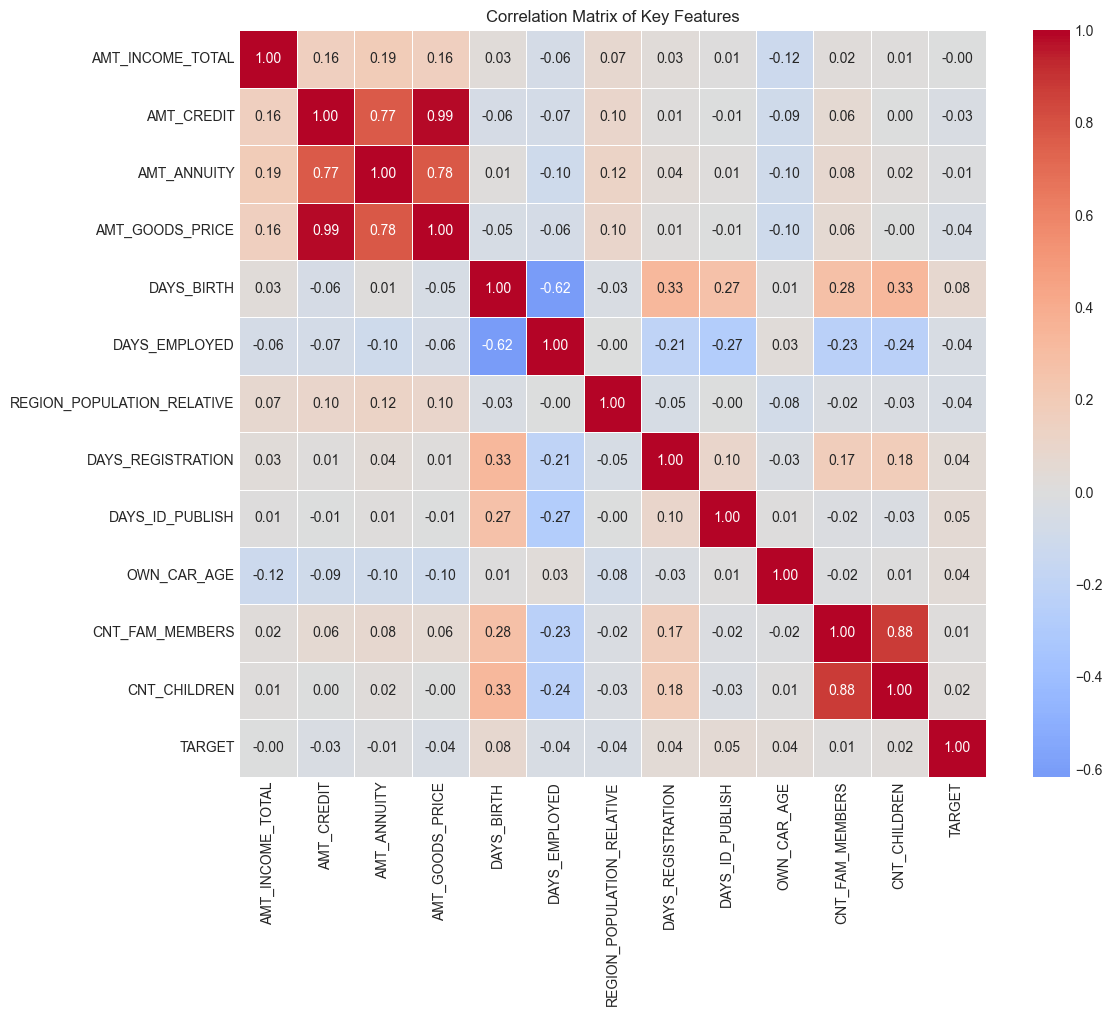

Features most correlated with TARGET:
TARGET               1.000000
DAYS_BIRTH           0.078239
DAYS_ID_PUBLISH      0.051457
DAYS_REGISTRATION    0.041975
OWN_CAR_AGE          0.037612
CNT_CHILDREN         0.019187
CNT_FAM_MEMBERS      0.009308
AMT_INCOME_TOTAL    -0.003982
AMT_ANNUITY         -0.012817
AMT_CREDIT          -0.030369
Name: TARGET, dtype: float64

Features least correlated with TARGET:
DAYS_REGISTRATION             0.041975
OWN_CAR_AGE                   0.037612
CNT_CHILDREN                  0.019187
CNT_FAM_MEMBERS               0.009308
AMT_INCOME_TOTAL             -0.003982
AMT_ANNUITY                  -0.012817
AMT_CREDIT                   -0.030369
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
DAYS_EMPLOYED                -0.044932
Name: TARGET, dtype: float64


In [26]:
# Calculate correlation matrix for key numeric features
key_numeric = [
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
    'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
    'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION',
    'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
    'CNT_CHILDREN', 'TARGET'
]

# Filter to columns that exist
key_numeric = [col for col in key_numeric if col in app_train.columns]

if len(key_numeric) > 1:
    corr_matrix = app_train[key_numeric].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=0.5)
    plt.title('Correlation Matrix of Key Features')
    plt.tight_layout()
    plt.show()
    
    # Show features most correlated with target
    if 'TARGET' in corr_matrix.columns:
        target_corr = corr_matrix['TARGET'].sort_values(ascending=False)
        print("Features most correlated with TARGET:")
        print(target_corr.head(10))
        print("\nFeatures least correlated with TARGET:")
        print(target_corr.tail(10))

## Explore Other Data Files

Loading bureau data (5% sample)...
Loading bureau.csv...
Initial memory usage: 6.49 MB
Final memory usage: 3.48 MB
Memory reduced by 46.3%
Loaded 50000 rows and 17 columns
Memory usage: 3.48 MB
Bureau data shape: (50000, 17)
=== Bureau Data Information ===
Shape: 50000 rows, 17 columns
Memory usage: 3.48 MB

Column Types:
float32    8
int32      3
str        3
int16      2
int8       1
Name: count, dtype: int64

Missing Values:
                        missing_count  missing_percent
AMT_ANNUITY                     39751           79.502
AMT_CREDIT_MAX_OVERDUE          32024           64.048
DAYS_ENDDATE_FACT               19222           38.444
AMT_CREDIT_SUM_LIMIT            16984           33.968
AMT_CREDIT_SUM_DEBT              7629           15.258
DAYS_CREDIT_ENDDATE              3151            6.302

Total missing values: 118,761
Percentage of data missing: 13.97%

Unique clients in bureau: 10171
Unique loans in bureau: 50000

Credit Types in Bureau:
CREDIT_TYPE
Consumer credit  

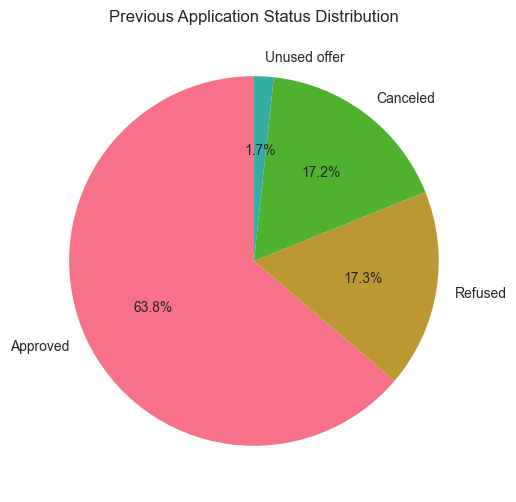

In [27]:
# Load bureau data (sample)
print("Loading bureau data (5% sample)...")
bureau = load_data(config['files']['bureau'], nrows=50000)  # Adjust nrows as needed
print(f"Bureau data shape: {bureau.shape}")

# Display bureau data information
if bureau is not None:
    display_data_info(bureau, "Bureau Data")
    
    # Show relationship with main application
    print(f"\nUnique clients in bureau: {bureau['SK_ID_CURR'].nunique()}")
    print(f"Unique loans in bureau: {bureau['SK_ID_BUREAU'].nunique()}")
    
    # Show credit types distribution
    if 'CREDIT_TYPE' in bureau.columns:
        print("\nCredit Types in Bureau:")
        print(bureau['CREDIT_TYPE'].value_counts().head(10))

# Load previous application data (sample)
print("\nLoading previous application data (5% sample)...")
prev_app = load_data(config['files']['previous_application'], nrows=50000)
print(f"Previous application data shape: {prev_app.shape}")

# Display previous application information
if prev_app is not None:
    display_data_info(prev_app, "Previous Application Data")
    
    # Show application status
    if 'NAME_CONTRACT_STATUS' in prev_app.columns:
        print("\nPrevious Application Status:")
        status_counts = prev_app['NAME_CONTRACT_STATUS'].value_counts()
        print(status_counts)
        
        plt.figure(figsize=(10, 6))
        status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
        plt.title('Previous Application Status Distribution')
        plt.ylabel('')
        plt.show()

## Key Insights

In [28]:
print("=" * 60)
print("KEY INSIGHTS FROM DATA EXPLORATION")
print("=" * 60)

print("\n1. TARGET DISTRIBUTION:")
print(f"   - Only {target_pct[1]:.2f}% of clients have payment difficulties")
print(f"   - This is a highly imbalanced classification problem")

print("\n2. DATA QUALITY:")
print(f"   - Training data has {app_train.shape[0]:,} rows and {app_train.shape[1]} columns")
print(f"   - {len(missing_df)} columns have missing values")
print(f"   - Overall missing data: {100 * missing.sum() / (app_train.shape[0] * app_train.shape[1]):.2f}%")

print("\n3. KEY PATTERNS:")
print("   - Default rate varies by demographic factors:")
if 'CODE_GENDER' in app_train.columns:
    gender_default = app_train.groupby('CODE_GENDER')['TARGET'].mean() * 100
    for gender, rate in gender_default.items():
        print(f"     * {gender}: {rate:.2f}% default rate")

if 'NAME_EDUCATION_TYPE' in app_train.columns:
    edu_default = app_train.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean() * 100
    print(f"   - Education impact: Lower education = higher default risk")

print("\n4. NEXT STEPS:")
print("   - Need to handle imbalanced data (oversampling/undersampling)")
print("   - Need to handle missing values")
print("   - Need feature engineering from multiple data sources")
print("   - Consider ensemble methods for better performance")

KEY INSIGHTS FROM DATA EXPLORATION

1. TARGET DISTRIBUTION:
   - Only 8.07% of clients have payment difficulties
   - This is a highly imbalanced classification problem

2. DATA QUALITY:
   - Training data has 307,511 rows and 123 columns
   - 67 columns have missing values
   - Overall missing data: 24.20%

3. KEY PATTERNS:
   - Default rate varies by demographic factors:
     * F: 7.00% default rate
     * M: 10.14% default rate
     * XNA: 0.00% default rate
   - Education impact: Lower education = higher default risk

4. NEXT STEPS:
   - Need to handle imbalanced data (oversampling/undersampling)
   - Need to handle missing values
   - Need feature engineering from multiple data sources
   - Consider ensemble methods for better performance


## Save Exploration Results

In [29]:
# Save summary statistics

summary_stats = {
    'target_distribution': dict(target_pct) if 'TARGET' in app_train.columns else {},
    'data_shape': [int(x) for x in app_train.shape],
    'missing_values': int(missing.sum()),
    'missing_percentage': float(100 * missing.sum() / (app_train.shape[0] * app_train.shape[1])),
    'numeric_features': int(len(numeric_cols)),
    'categorical_features': int(len(categorical_cols))
}

import json
with open('exploration_summary.json', 'w') as f:
    json.dump(summary_stats, f, indent=4)

print("Exploration summary saved to exploration_summary.json")

Exploration summary saved to exploration_summary.json
